In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import models, layers, optimizers
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt

tf.random.set_seed(42)

ModuleNotFoundError: No module named 'sklearn'

In [2]:
train=pd.read_csv(r'D:\emnist-letters-test.csv')
test=pd.read_csv(r'D:\emnist-letters-train.csv')

In [3]:
train.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(14799, 785)

In [5]:
train.describe()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
count,14799.000000,14799.0,14799.0,14799.0,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,...,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0
mean,9.757348,0.0,0.0,0.0,0.0,0.000878,0.024123,0.044665,0.018717,0.020677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344262,0.0,0.0,0.0,0.0,0.106863,1.413602,2.611553,1.100437,1.238699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#images = []
#labels = []
#for i in range(len(train)):
   # image = np.flipud(np.rot90(train.iloc[i, 1:].to_numpy().reshape(28,28)))
   # images.append(image)
#     label = train.iloc[i, 0]
#     labels.append(label)
# X_training = np.array(images)
# y_training= np.array(labels)
# y_training= y_training - 1



In [7]:
# images = []
# labels = []

# for i in range(len(test)):
#     image = np.flipud(np.rot90(test.iloc[i, 1:].to_numpy().reshape(28,28)))
#     images.append(image)
#     label = test.iloc[i, 0]
#     labels.append(label)
# X_testing = np.array(images)
# y_testing = np.array(labels)
# y_testing = y_testing - 1

In [8]:
# X_training = np.expand_dims(X_training, axis=-1)
# X_testing = np.expand_dims(X_testing, axis=-1)

In [9]:
# for i in range(10):
#     plt.imshow(X_training[i])
#     plt.text(0.5, -1, chr(y_training[i] + 65))
#     plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Columns: 785 entries, 1 to 0.557
dtypes: int64(785)
memory usage: 88.6 MB


In [11]:
train.isnull().sum()

1        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.553    0
0.554    0
0.555    0
0.556    0
0.557    0
Length: 785, dtype: int64

In [12]:
y_train = np.array(train.iloc[:,0].values)
x_train = np.array(train.iloc[:,1:].values)
#test_set
y_test = np.array(test.iloc[:,0].values)
x_test = np.array(test.iloc[:,1:].values)
print(y_train.shape)
print(x_train.shape)

(14799,)
(14799, 784)


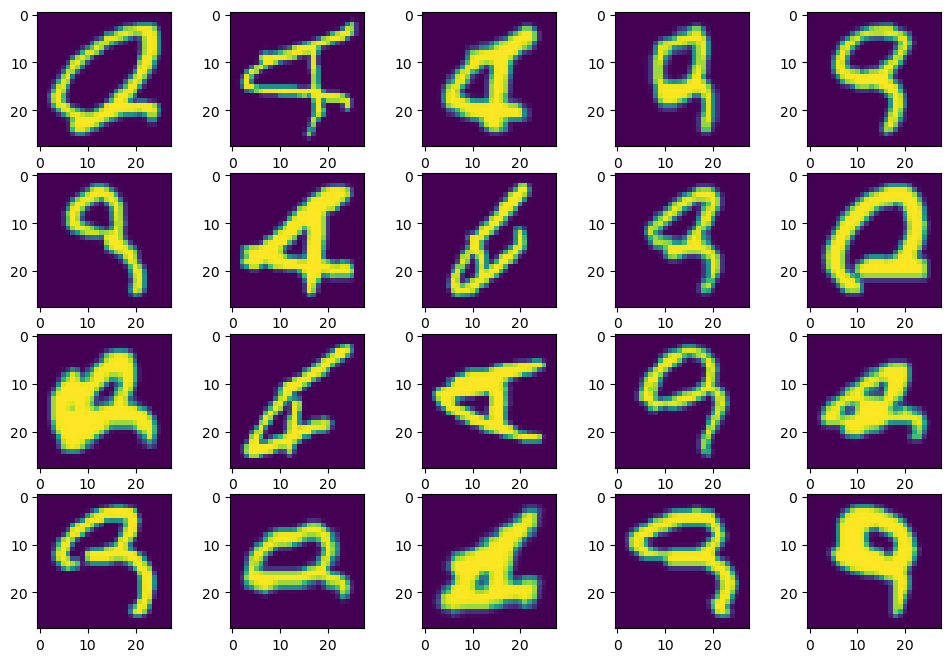

In [13]:
fig, axes = plt.subplots(4, 5,figsize=(12,8))

for i, j in enumerate(axes.flat):
    j.imshow(x_train[i+2].reshape([28,28]))

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to have a single color channel (since EMNIST is grayscale)
# and match the input shape expected by the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the target labels for categorical classification.
y_train = tf.keras.utils.to_categorical(y_train, 37)  # 37 classes (26 letters + 1 for 'none')
y_test = tf.keras.utils.to_categorical(y_test, 37)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train ,test_size=0.2,random_state = 42)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(37,activation='softmax')
])


In [17]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics=(["accuracy"]))

In [20]:
model.fit(x_train, y_train, 
                    epochs=4,
                    batch_size=100,
                    validation_data=(x_test, y_test))

Epoch 1/4
119/119 [==============================] - 10s 82ms/step - loss: 0.3608 - accuracy: 0.8752 - val_loss: 0.3915 - val_accuracy: 0.8753
Epoch 2/4
119/119 [==============================] - 10s 82ms/step - loss: 0.2864 - accuracy: 0.8994 - val_loss: 0.3545 - val_accuracy: 0.8736
Epoch 3/4
119/119 [==============================] - 9s 78ms/step - loss: 0.2456 - accuracy: 0.9138 - val_loss: 0.3257 - val_accuracy: 0.8848
Epoch 4/4
119/119 [==============================] - 9s 77ms/step - loss: 0.2127 - accuracy: 0.9217 - val_loss: 0.3095 - val_accuracy: 0.8949


93/93 [==============================] - 1s 10ms/step


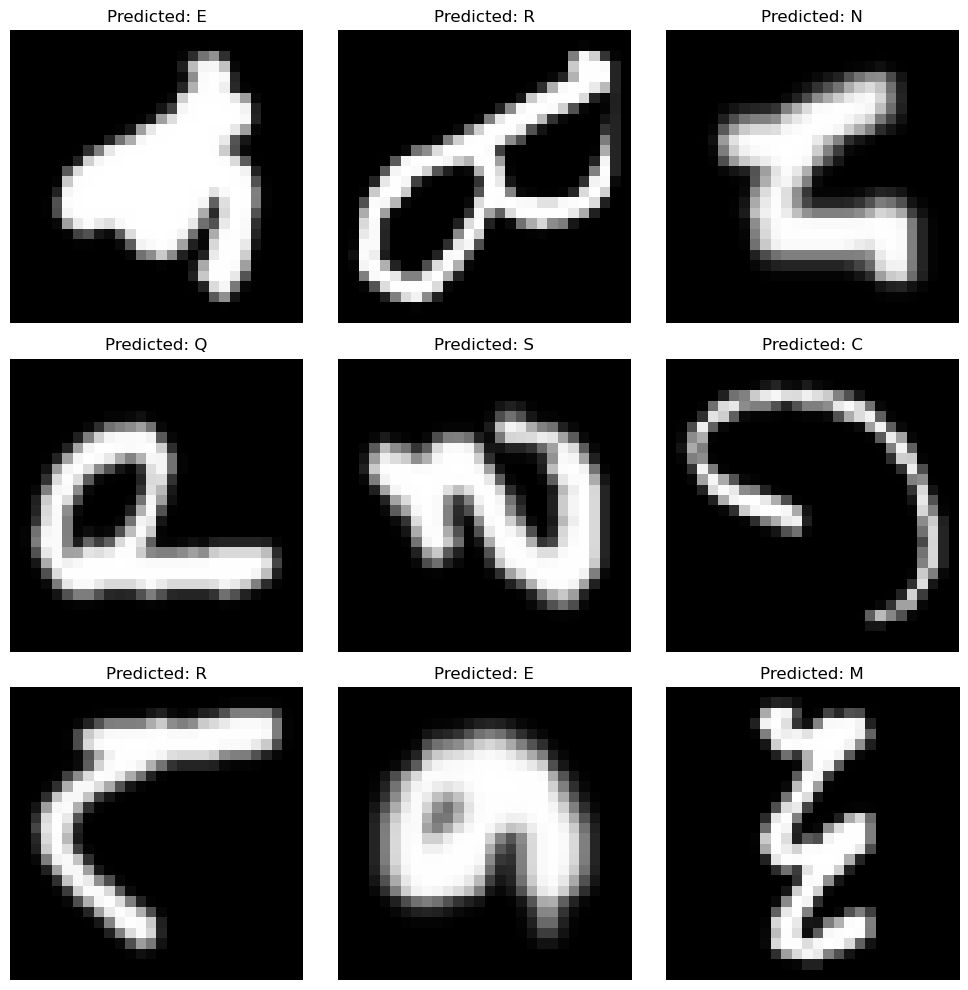

In [21]:
predictions = model.predict(x_test)

# Dictionary mapping numeric labels to letters (assuming labels start from 1)
label_map = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 
             11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 
             20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}

# Plot the images along with predicted letters
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range as per your requirement
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the character image
    predicted_label = np.argmax(predictions[i])  # Get the index of the predicted label
    predicted_letter = label_map[predicted_label]  # Get the predicted letter from the dictionary
    plt.title(f'Predicted: {predicted_letter}')
    plt.axis('off')

plt.tight_layout()
plt.show()